In [1]:
#Crear las carpetas para subir las imagenes
!mkdir goku
!mkdir vegeta
!mkdir gohan

In [2]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd goku
!unzip goku.zip
%cd ..

%cd vegeta
!unzip vegeta.zip
%cd ..

%cd gohan
!unzip gohan.zip
%cd ..

/content/goku
Archive:  goku.zip
 extracting: image.jpeg              
 extracting: image2.jpeg             
 extracting: image3.jpeg             
 extracting: image4.jpeg             
 extracting: image5.jpeg             
 extracting: image6.jpeg             
 extracting: image7.jpeg             
 extracting: image8.jpeg             
 extracting: image9.jpeg             
 extracting: image10.jpeg            
 extracting: image11.jpeg            
 extracting: image12.jpeg            
 extracting: image13.jpeg            
 extracting: image14.jpeg            
 extracting: image15.jpeg            
 extracting: image16.jpeg            
 extracting: image17.jpeg            
 extracting: image18.jpeg            
 extracting: image19.jpeg            
 extracting: image20.jpeg            
 extracting: image21.jpeg            
 extracting: image22.jpeg            
 extracting: image23.jpeg            
 extracting: image24.jpeg            
 extracting: image25.jpeg            
 extracting: imag

In [3]:
#Borrar los archivo ZIP
!rm -rf /content/goku/goku.zip
!rm -rf /content/vegeta/vegeta.zip
!rm -rf /content/gohan/gohan.zip

In [4]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/goku | wc -l #475
!ls /content/vegeta | wc -l #515
!ls /content/gohan | wc -l #419

483
535
518


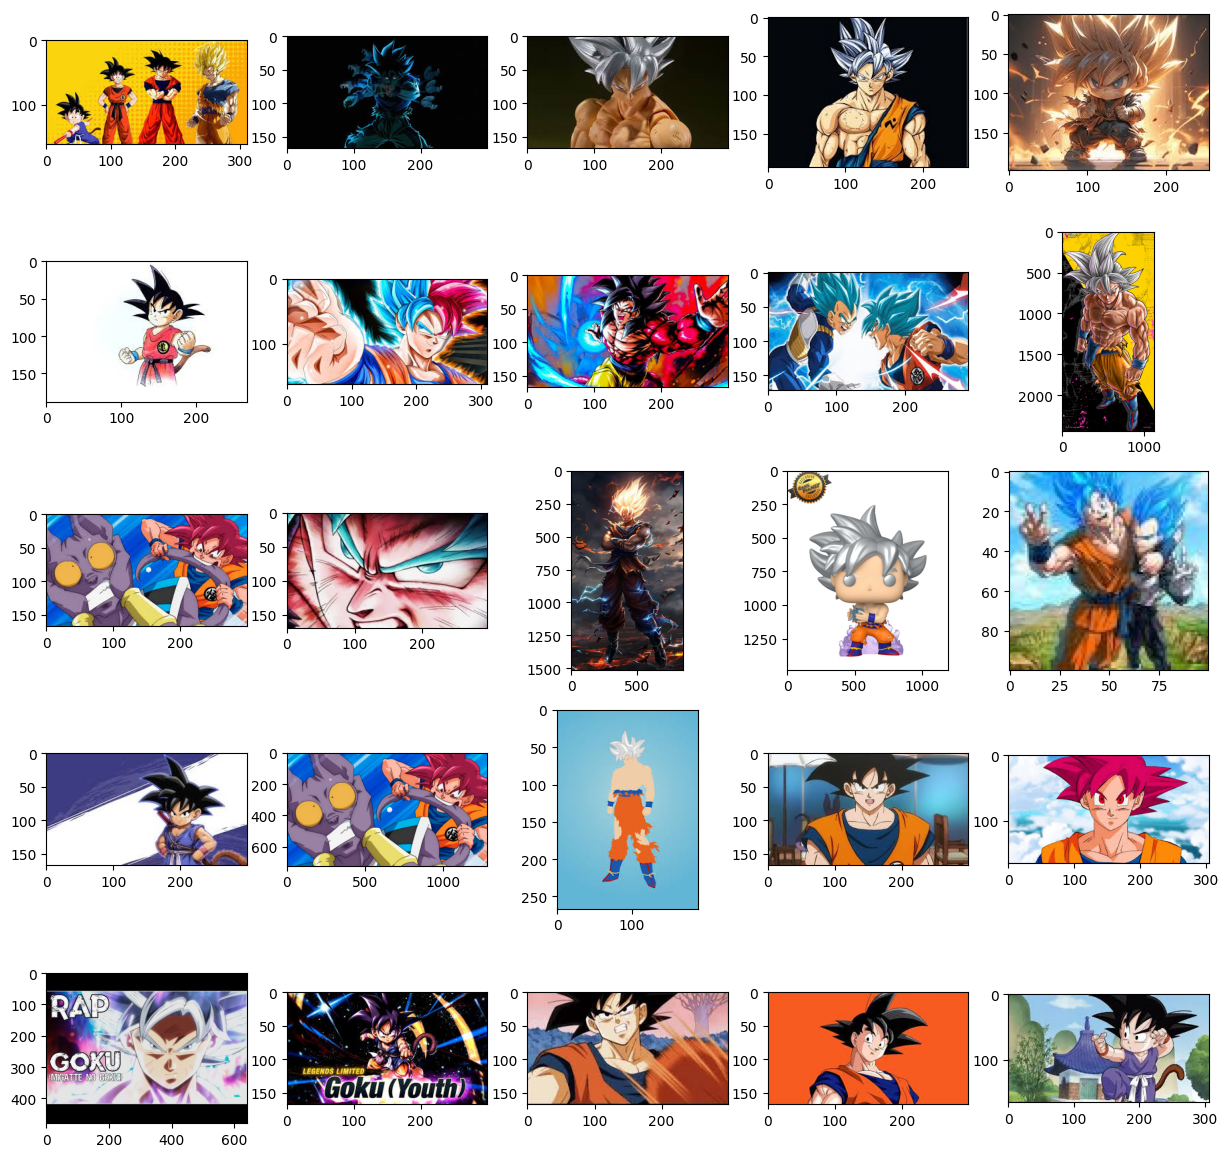

In [6]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/goku'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [7]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/goku
!mkdir dataset/vegeta
!mkdir dataset/gohan

In [8]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/goku'
carpeta_destino = '/content/dataset/goku'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 483:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
carpeta_fuente = '/content/vegeta'
carpeta_destino = '/content/dataset/vegeta'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 483:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
carpeta_fuente = '/content/gohan'
carpeta_destino = '/content/dataset/gohan'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 483:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [12]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/goku | wc -l
!ls /content/dataset/vegeta | wc -l
!ls /content/dataset/gohan | wc -l

483
483
483


Found 1161 images belonging to 3 classes.
Found 288 images belonging to 3 classes.


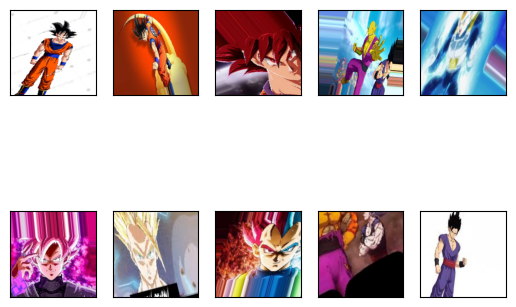

In [13]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [14]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [15]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [16]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
37/37 [==============================] - ETA: 0s - loss: 1.2322 - accuracy: 0.3988

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 [==============================] - 89s 2s/step - loss: 1.2322 - accuracy: 0.3988 - val_loss: 1.1863 - val_accuracy: 0.4340
Epoch 2/50
37/37 [==============================] - 77s 2s/step - loss: 1.0596 - accuracy: 0.4522 - val_loss: 1.0300 - val_accuracy: 0.4792
Epoch 3/50
37/37 [==============================] - 81s 2s/step - loss: 0.9576 - accuracy: 0.5409 - val_loss: 0.9177 - val_accuracy: 0.5590
Epoch 4/50
37/37 [==============================] - 82s 2s/step - loss: 0.9078 - accuracy: 0.5780 - val_loss: 0.9699 - val_accuracy: 0.5208
Epoch 5/50
37/37 [==============================] - 85s 2s/step - loss: 0.8851 - accuracy: 0.5900 - val_loss: 0.8789 - val_accuracy: 0.5764
Epoch 6/50
37/37 [==============================] - 79s 2s/step - loss: 0.8455 - accuracy: 0.6055 - val_loss: 0.9298 - val_accuracy: 0.5694
Epoch 7/50
37/37 [==============================] - 80s 2s/step - loss: 0.8358 - accuracy: 0.6227 - val_loss: 0.8921 - val_accuracy: 0.5868
Epoch 8/50
37/37 [=============

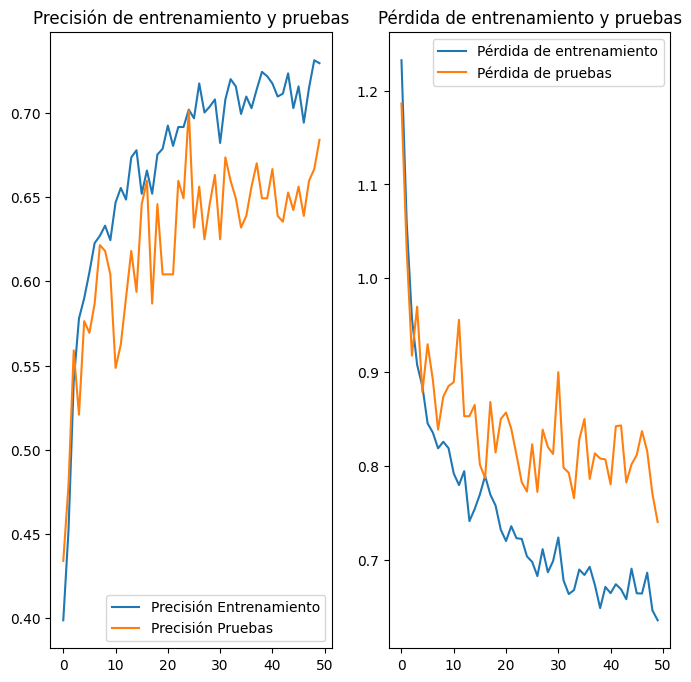

In [20]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [21]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [38]:
#1 = goku, 2 = vegeta, 0 = gohan
url = 'https://i.pinimg.com/564x/9a/58/e6/9a58e64dba179f4f342c9b12e2c33270.jpg' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 84ms/step
0


In [39]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/personajes_dragonball/1

In [40]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/personajes_dragonball/1')

In [41]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_cocina.zip /content/carpeta_salida/personajes_dragonball/

  adding: content/carpeta_salida/personajes_dragonball/ (stored 0%)
  adding: content/carpeta_salida/personajes_dragonball/1/ (stored 0%)
  adding: content/carpeta_salida/personajes_dragonball/1/variables/ (stored 0%)
  adding: content/carpeta_salida/personajes_dragonball/1/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_salida/personajes_dragonball/1/variables/variables.index (deflated 78%)
  adding: content/carpeta_salida/personajes_dragonball/1/fingerprint.pb (stored 0%)
  adding: content/carpeta_salida/personajes_dragonball/1/keras_metadata.pb (deflated 80%)
  adding: content/carpeta_salida/personajes_dragonball/1/saved_model.pb (deflated 91%)
  adding: content/carpeta_salida/personajes_dragonball/1/assets/ (stored 0%)
